# Тесты ограничений на угол и минимальный размер, позволяющих генерировать валидные семплы с квадратами

In [3]:
import os 
import sys 
import numpy as np 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.data.utils import plot_filled_square
from src.schemas.data.figures import Square
from src.consts import IMG_SIZE
from typing import List 
import matplotlib.pyplot as plt 

In [34]:
GREEN = (0, 255, 0)


def display_AA_effect_on_square(side: int, angles_degrees: List[int]):
    fig, axes = plt.subplots(2, len(angles_degrees), figsize=(15, 5))
    AA_row = 0
    no_AA_row = 1    
    for ax, row in zip(axes[:,0], ["WITH AA", "WITHOUT AA"]):
        ax.set_ylabel(row, rotation=90, size='large')

    for column_index, angle in enumerate(angles_degrees):
        no_aa_img = np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)        
        aa_img = np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
        
        square = Square(
            x_center_pxl=IMG_SIZE // 2,
            y_center_pxl=IMG_SIZE // 2,
            side_length_pxl=side,
            angle_degrees=angle,            
        )
        
        plot_filled_square(no_aa_img, square, color=GREEN, use_aa=False)
        axes[no_AA_row, column_index].imshow(no_aa_img)
        axes[no_AA_row, column_index].set_title(f"angle={angle}")
        plot_filled_square(aa_img, square, color=GREEN, use_aa=True)
        axes[AA_row, column_index].imshow(aa_img)
        axes[AA_row, column_index].set_title(f"angle={angle}")

    fig.suptitle(f"SIDE pxl = {side}")

    plt.tight_layout()
    plt.show()

# углы и antialising EDA

При отрисовке квадратов с поворотами на целевом разрешении 32x32, из-за того, что оно довольно маленькое, есть риск, что некоторые комбинации (сторона, угол) будут похожи на круги. Поэтому имеет смысл понять минимальный размер, при котором полученные семплы будут можно уверенно считать квадратами

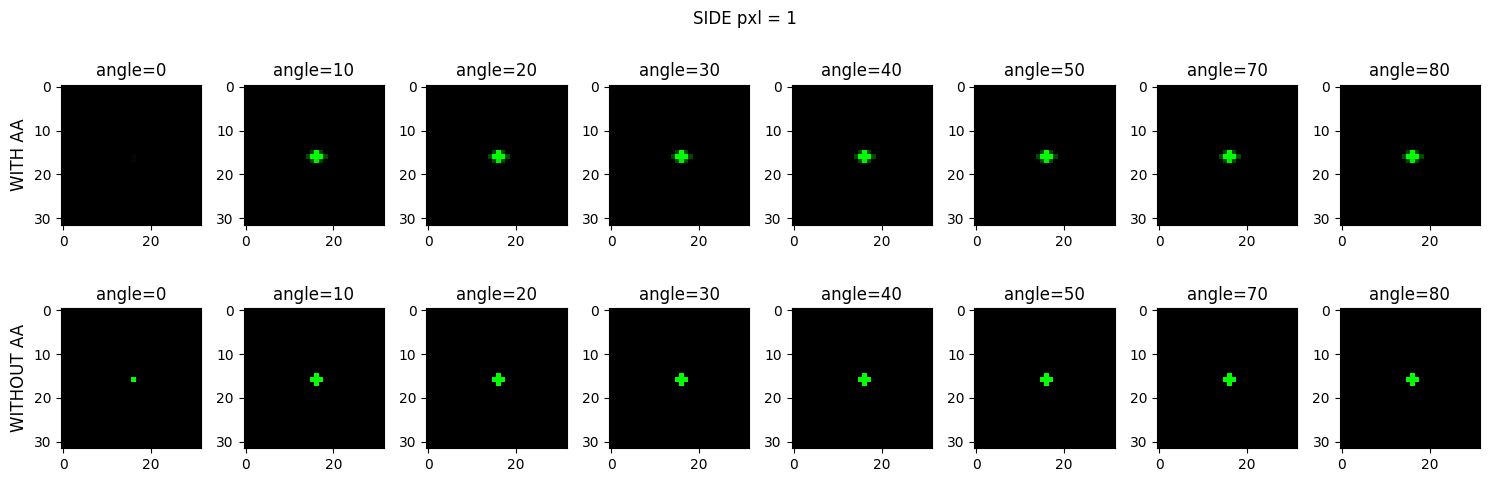

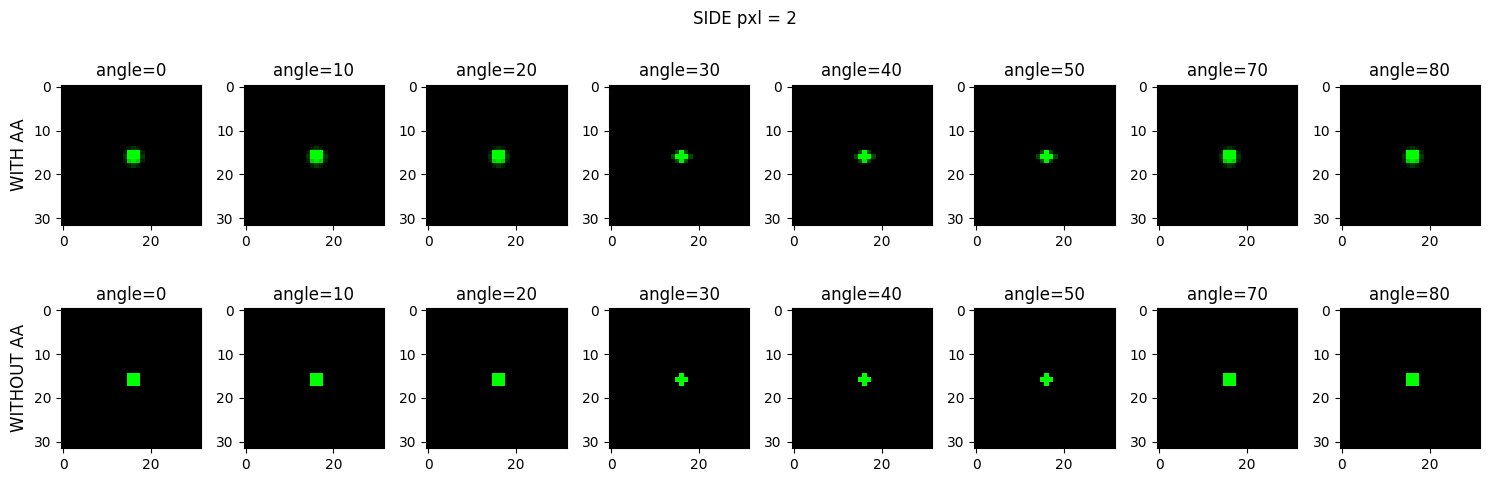

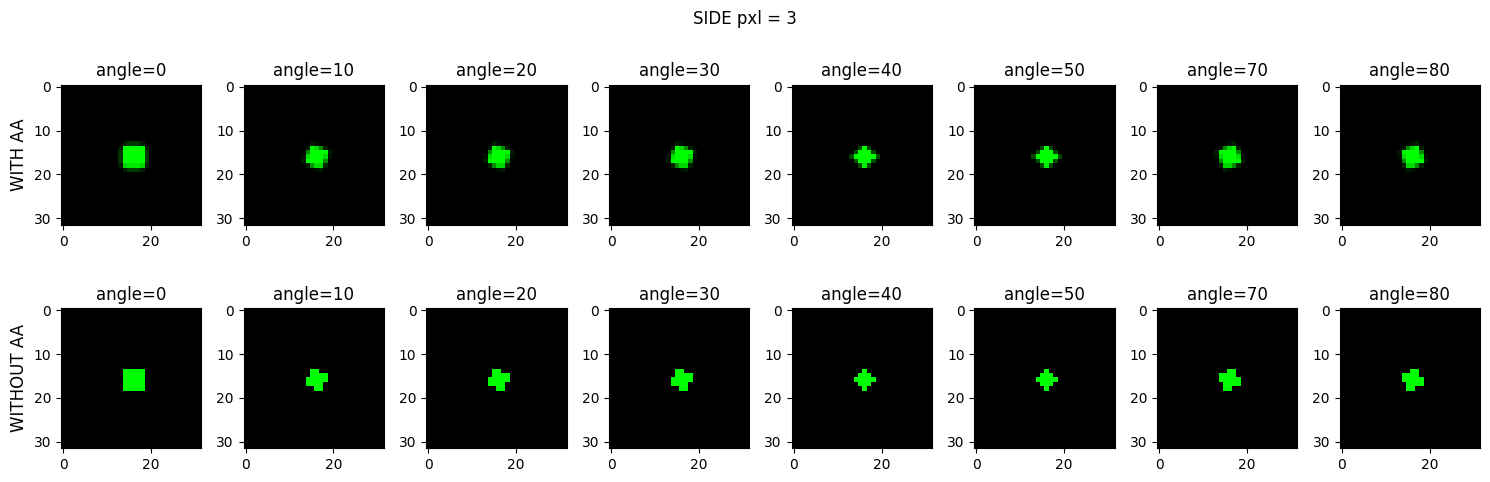

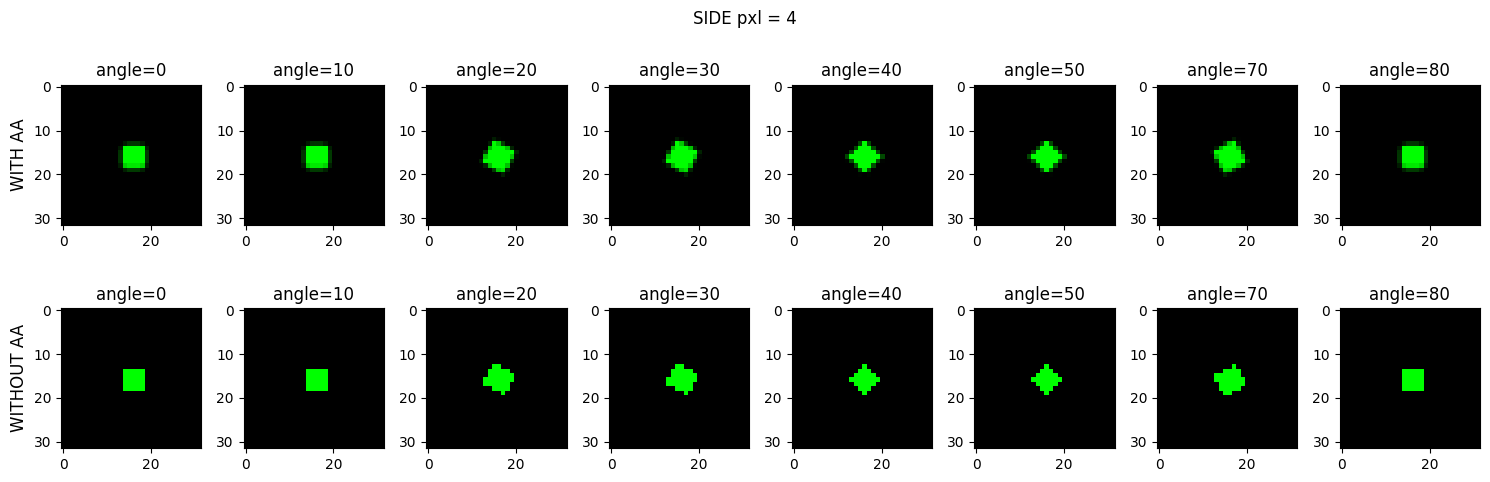

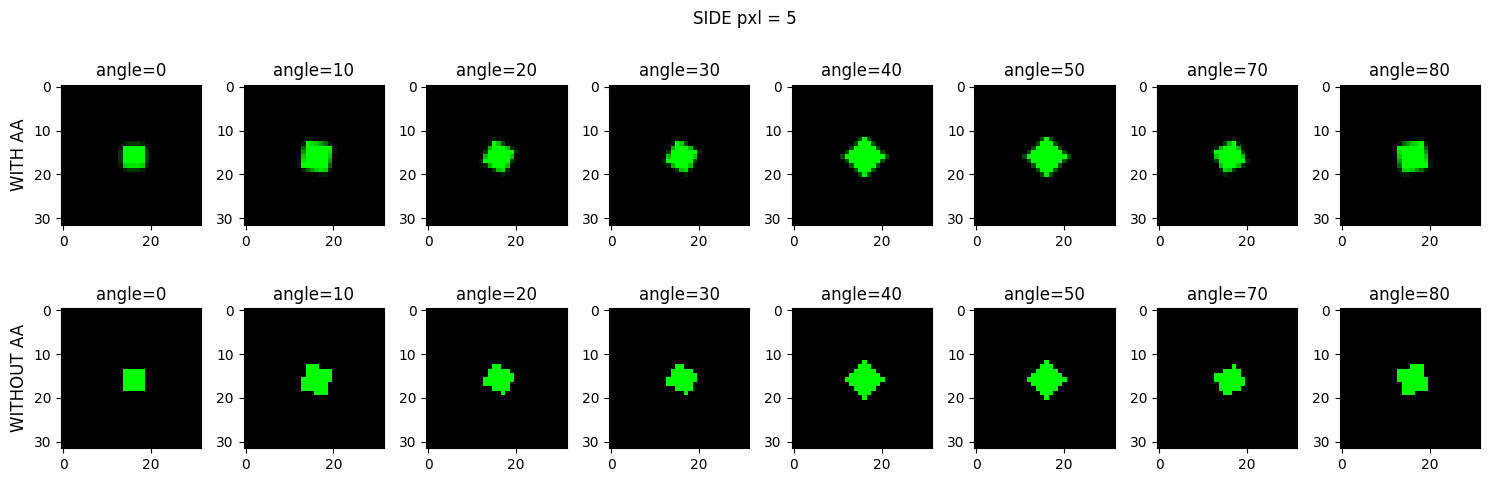

In [43]:
display_AA_effect_on_square(1, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])
display_AA_effect_on_square(2, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])
display_AA_effect_on_square(3, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])
display_AA_effect_on_square(4, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])
display_AA_effect_on_square(5, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])

Семплы со сторонами 1-2 pxl, слишком маленькие чтобы выдавать адекватные квадраты при поворотах. Начиная со стороны=3 pxl проблемными являются только некоторые углы (например 20 градусов), рассмотрим более крупные размеры  

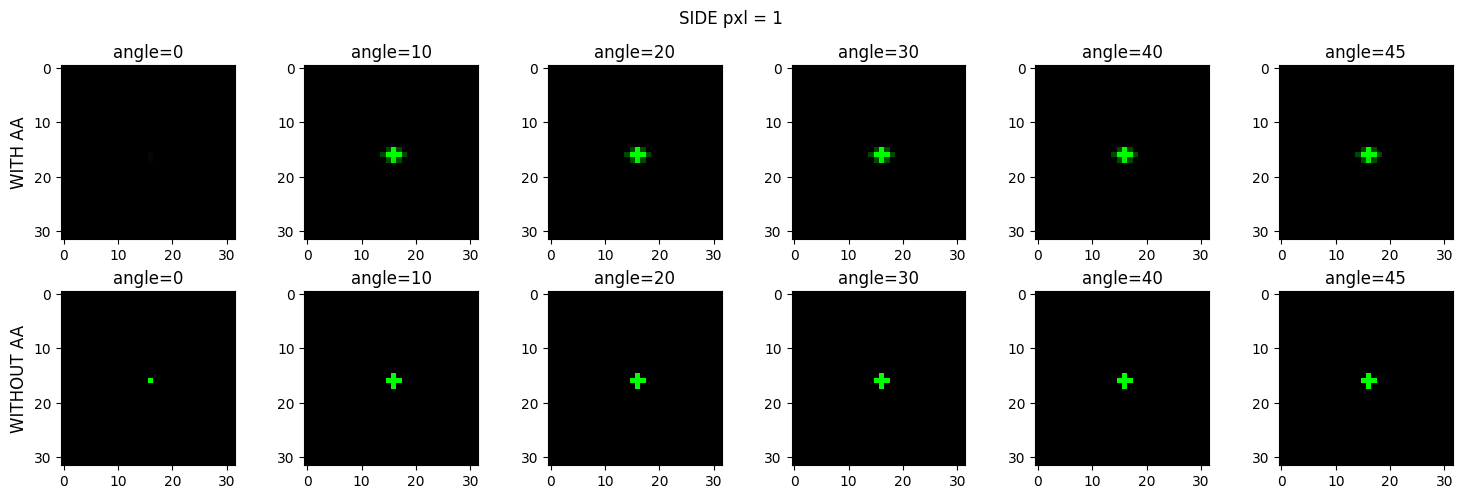

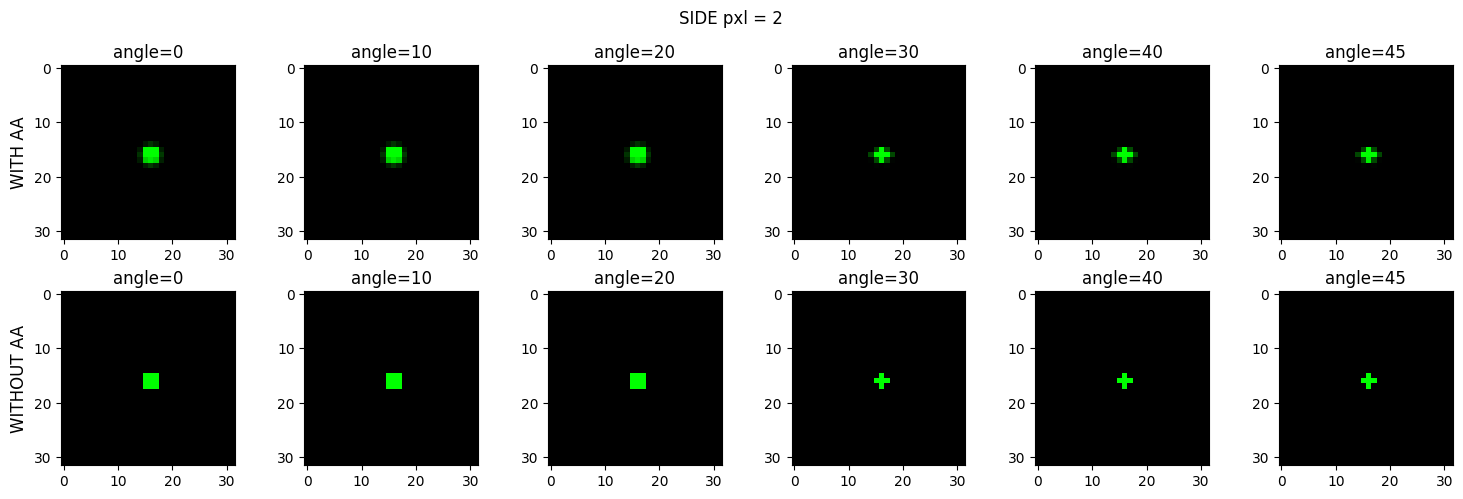

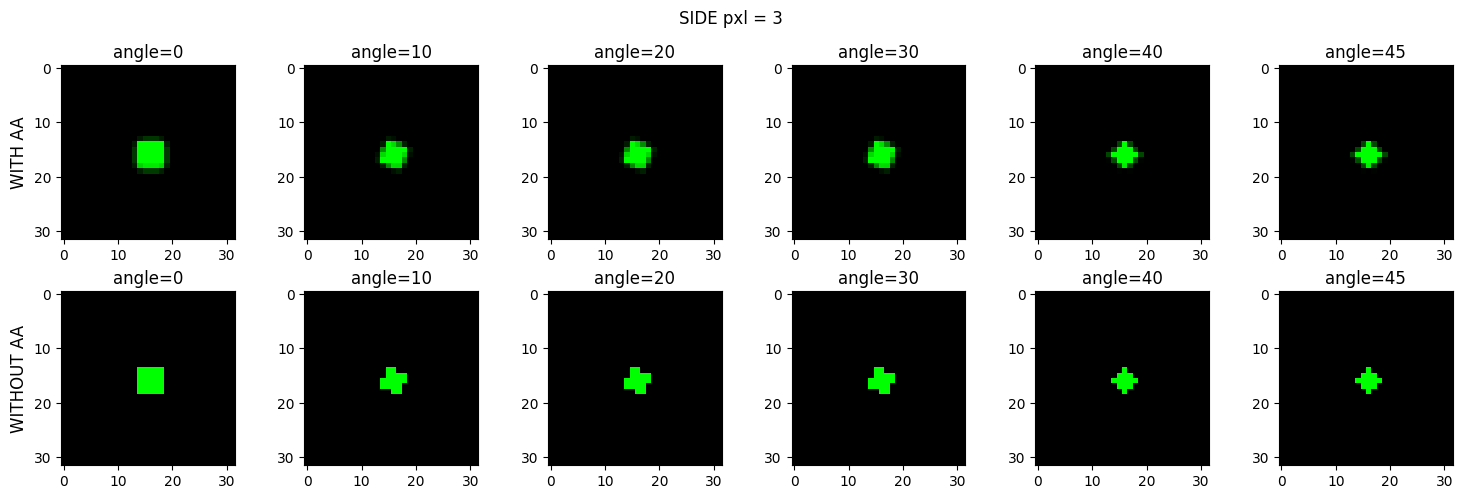

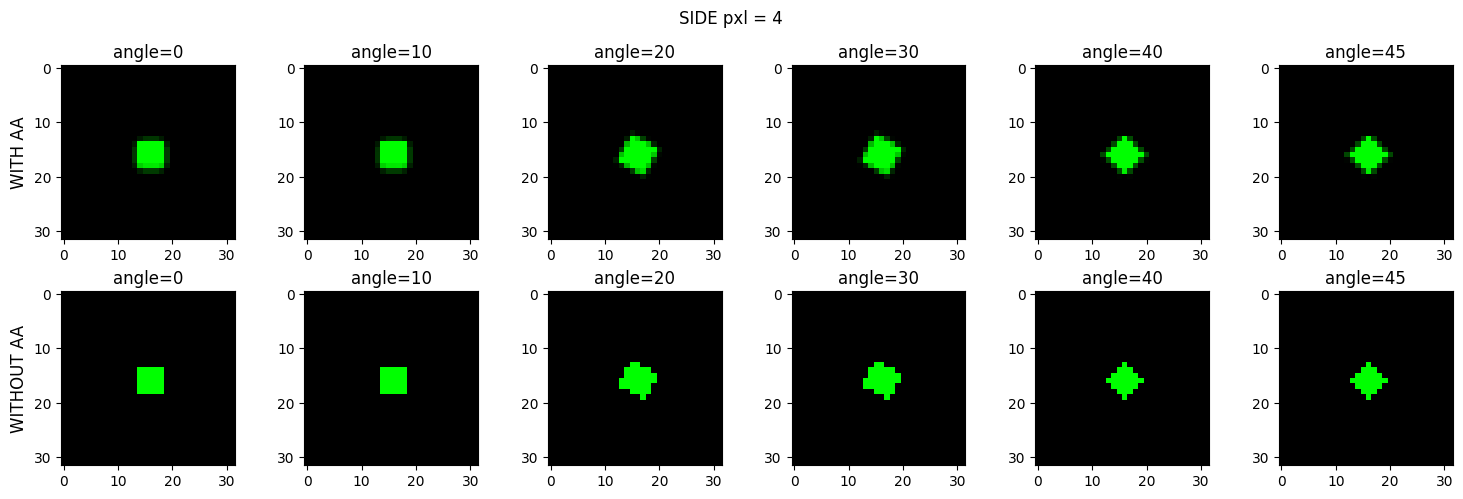

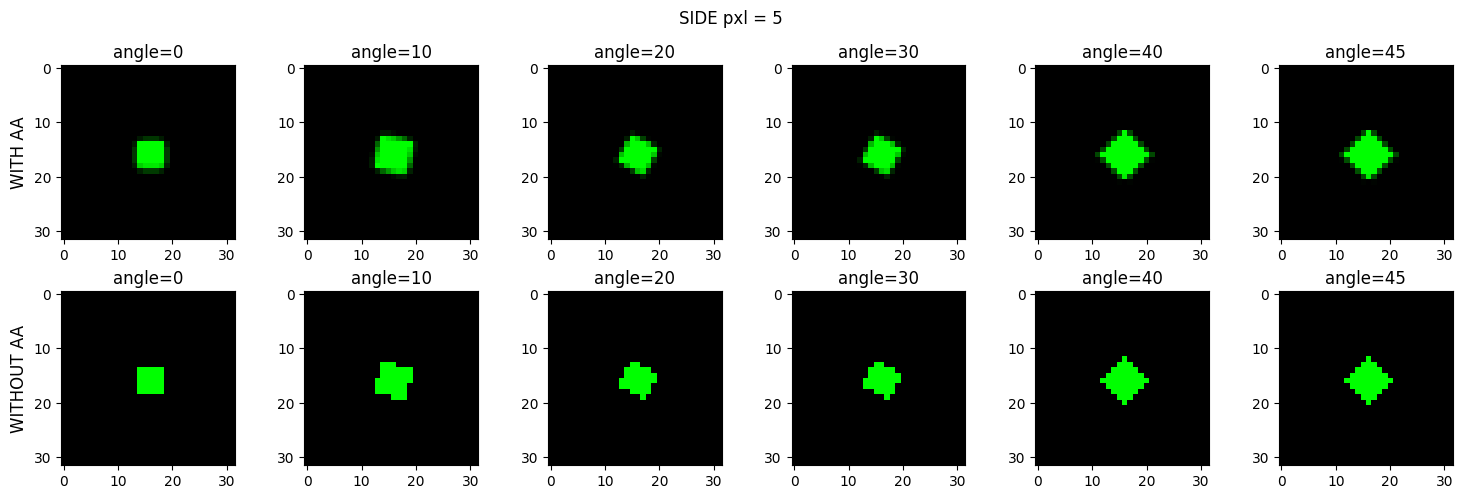

In [35]:
display_AA_effect_on_square(1, angles_degrees=[0, 10, 20, 30, 40, 45])
display_AA_effect_on_square(2, angles_degrees=[0, 10, 20, 30, 40, 45])
display_AA_effect_on_square(3, angles_degrees=[0, 10, 20, 30, 40, 45])
display_AA_effect_on_square(4, angles_degrees=[0, 10, 20, 30, 40, 45])
display_AA_effect_on_square(5, angles_degrees=[0, 10, 20, 30, 40, 45])

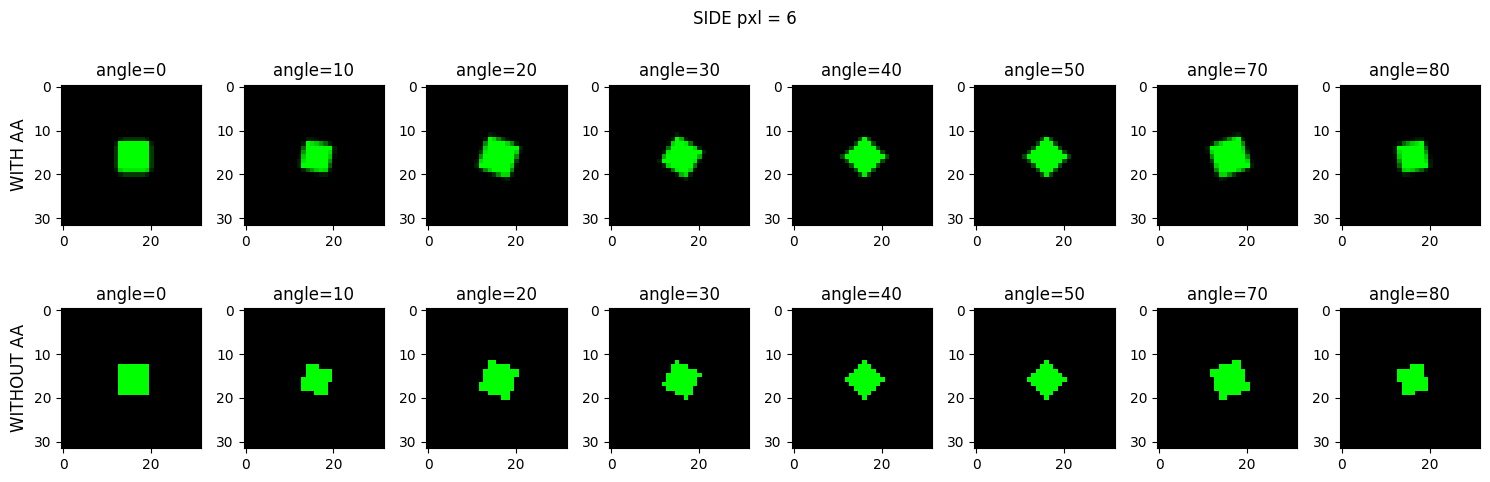

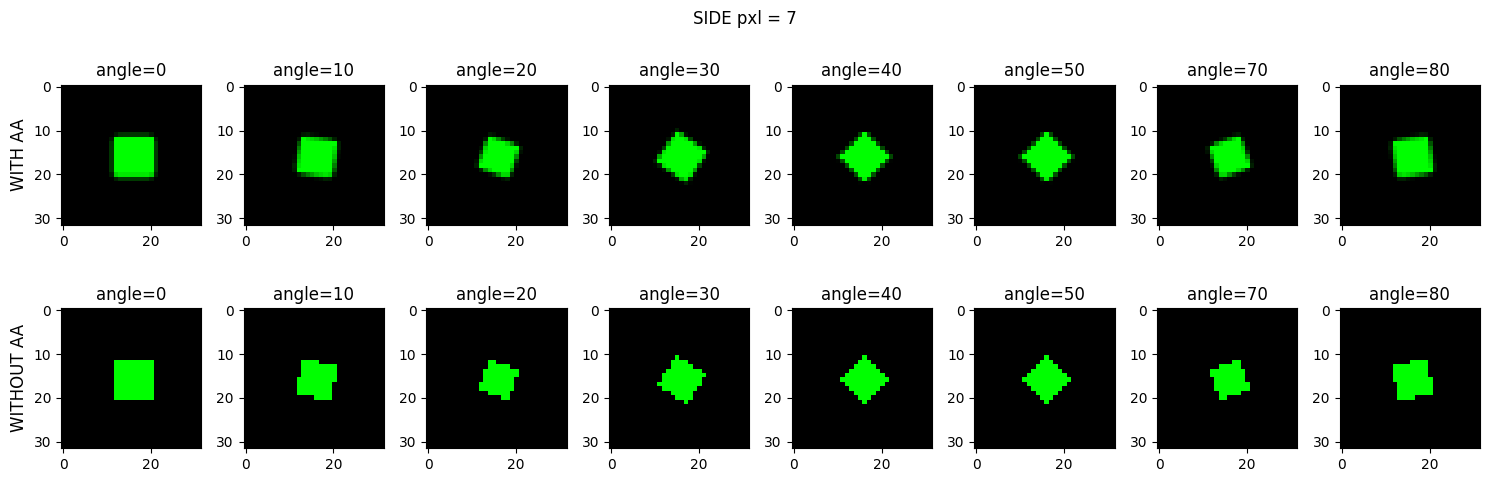

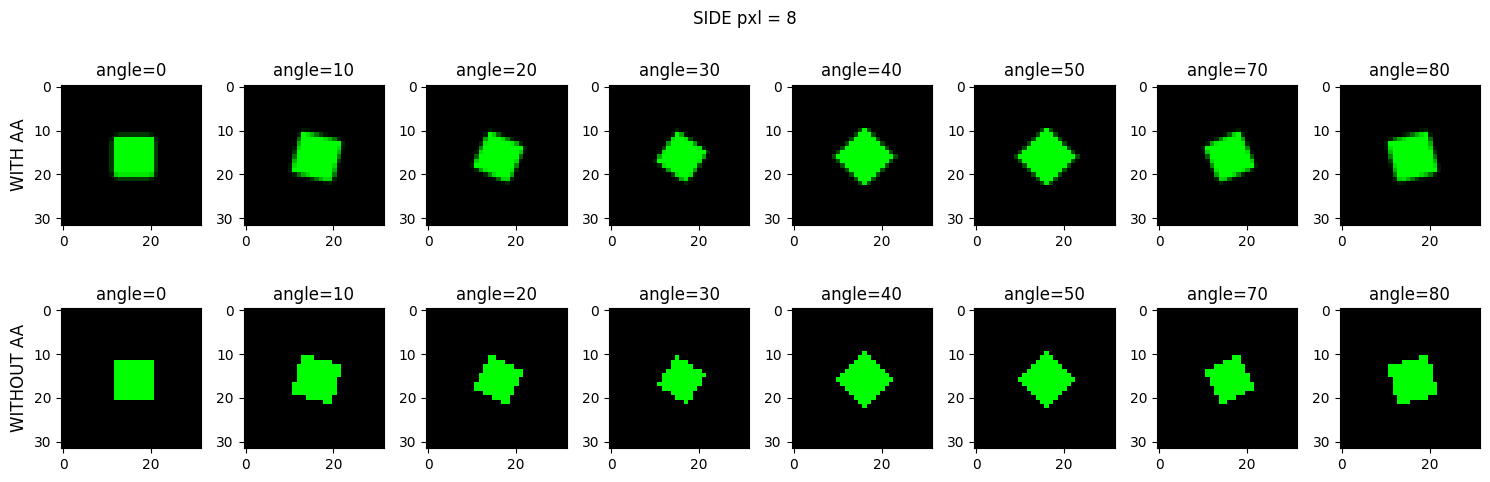

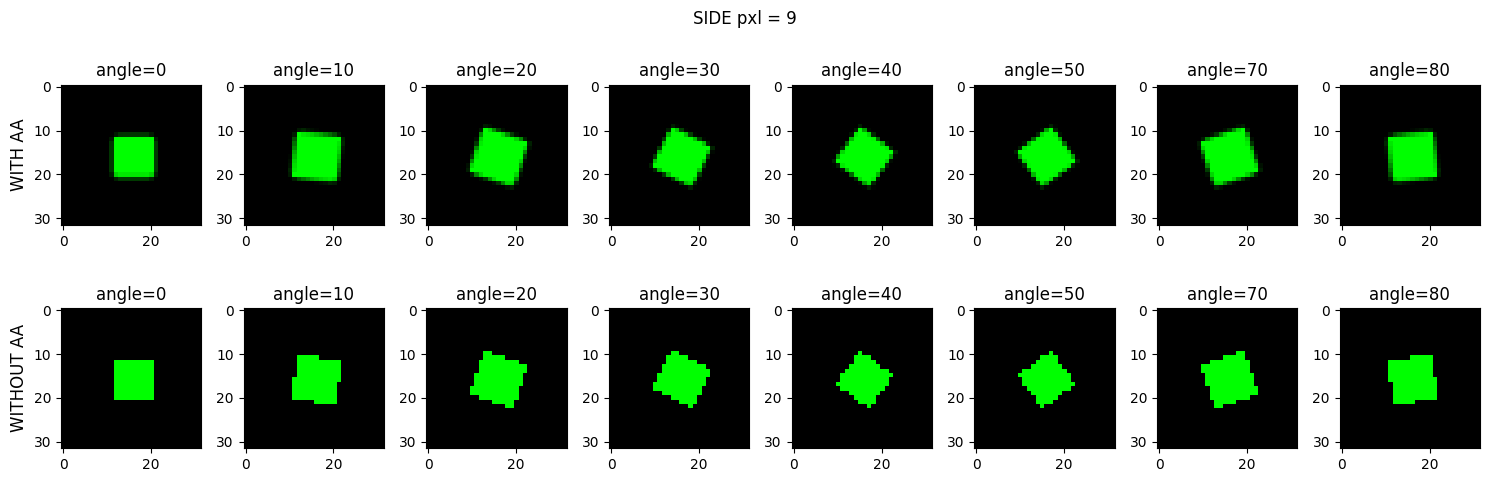

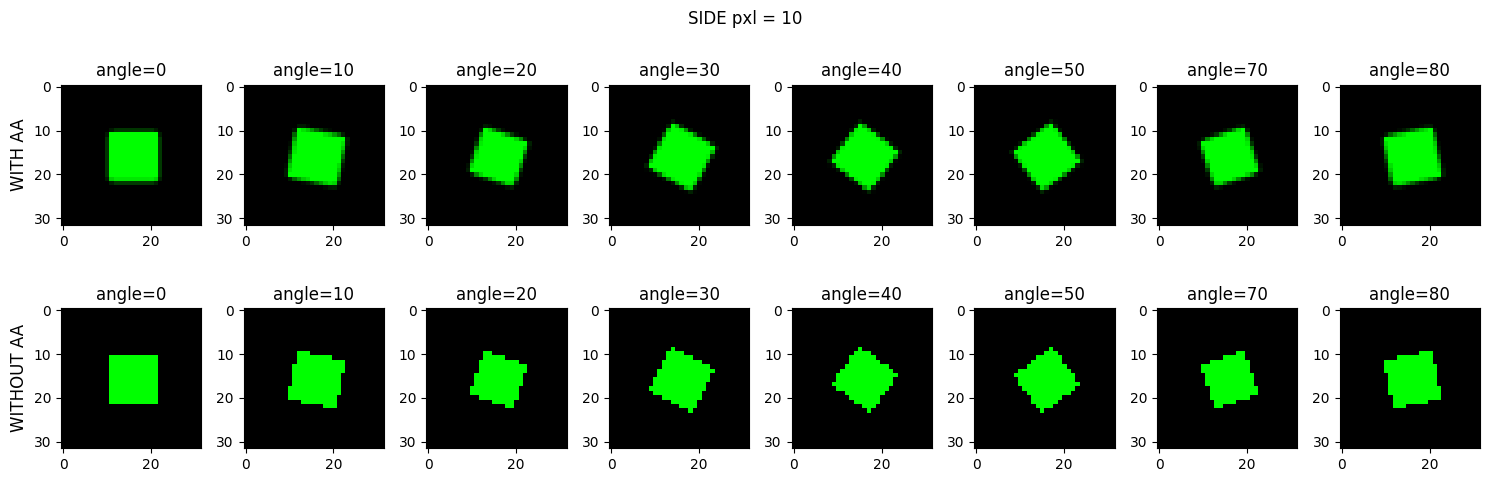

In [44]:
display_AA_effect_on_square(6, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])
display_AA_effect_on_square(7, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])
display_AA_effect_on_square(8, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])
display_AA_effect_on_square(9, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])
display_AA_effect_on_square(10, angles_degrees=[0, 10, 20, 30, 40, 50, 70, 80])

Кажется что начиная со стороны 7=pxl можно получать адекватные семплы на тестируемых поворотах, проверим работу при маленьких поворотах

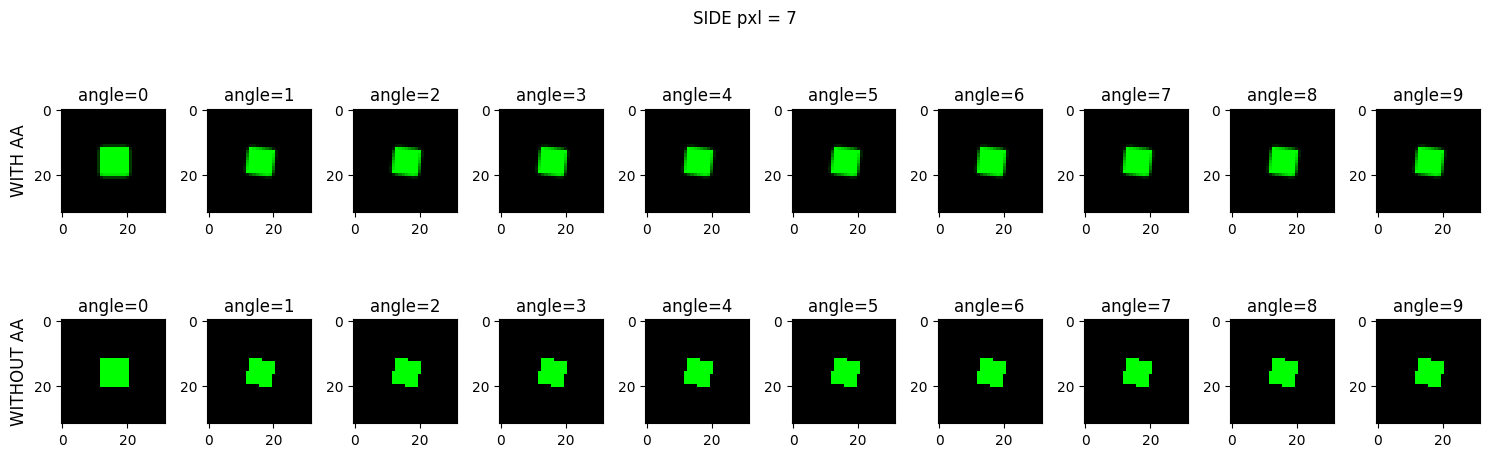

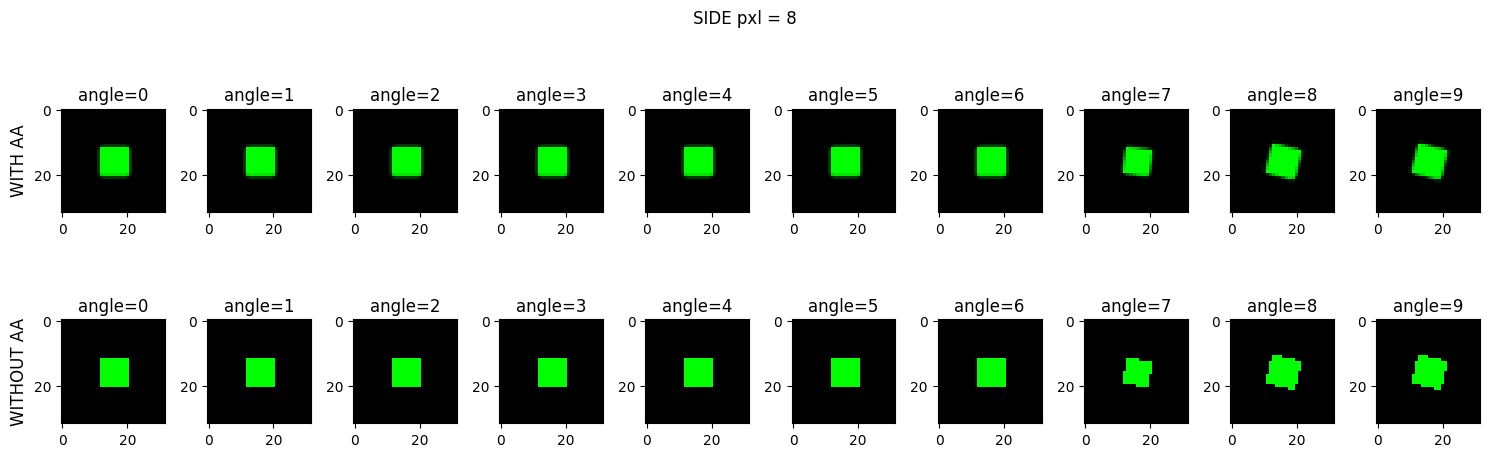

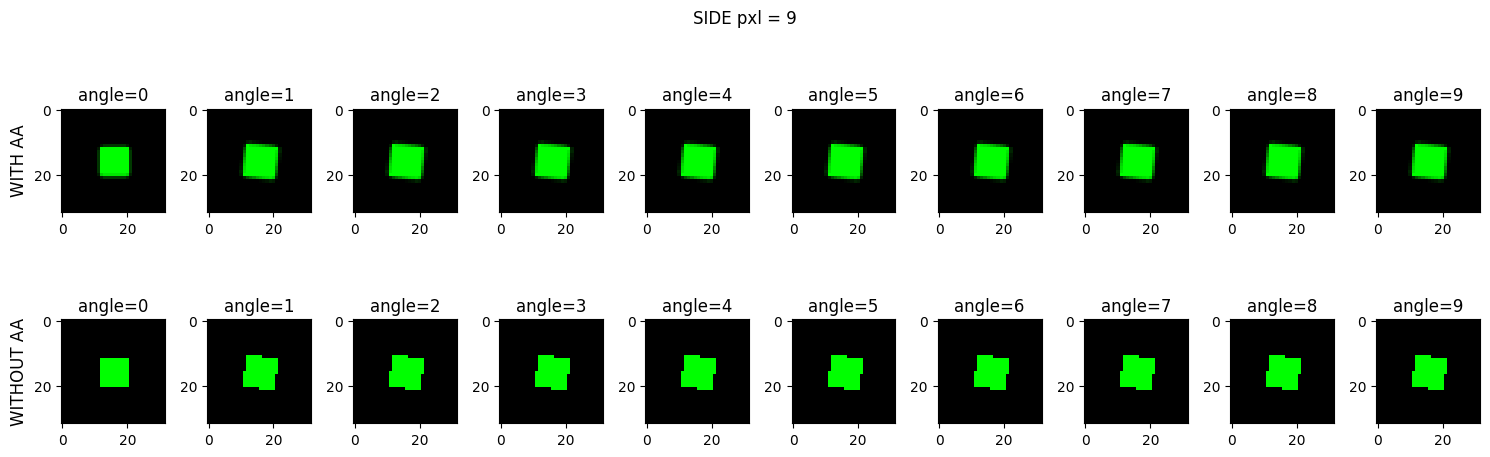

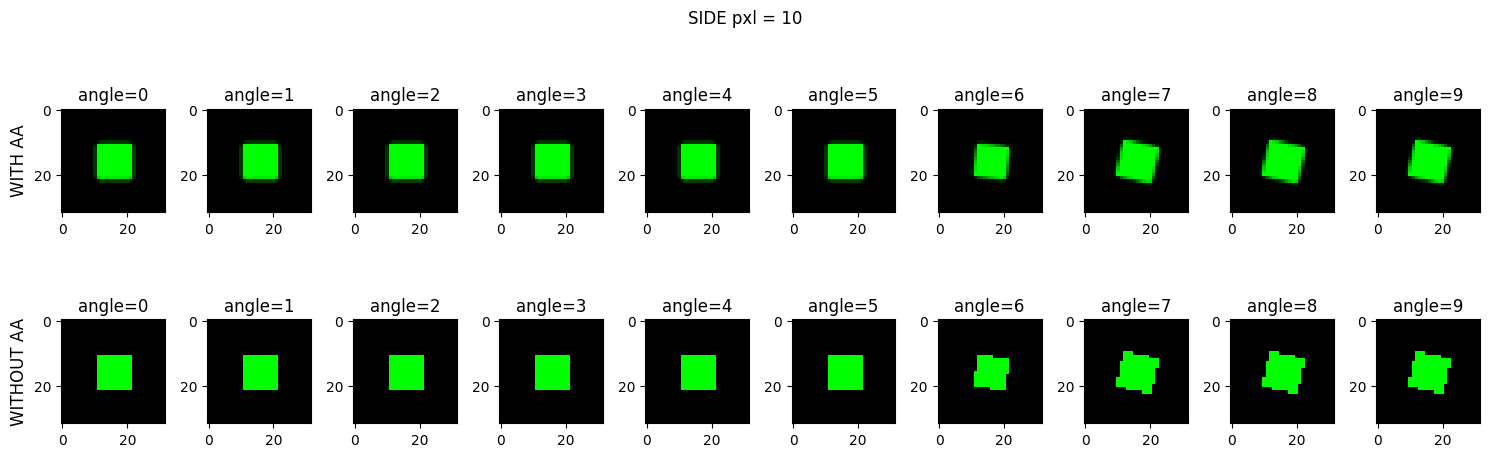

In [45]:
small_angles = list(range(10))
display_AA_effect_on_square(7, angles_degrees=small_angles)
display_AA_effect_on_square(8, angles_degrees=small_angles)
display_AA_effect_on_square(9, angles_degrees=small_angles)
display_AA_effect_on_square(10, angles_degrees=small_angles)

Вывод генерируя квадраты со стороной более чем 7 pxl и используя antialiasing можно получать валидные семплы квадратов